In [1]:
import numpy as np
import pandas as pd
import sklearn
import string
import re
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import scale


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
if(re.fullmatch('[1-9]+[-][a-b]+','23457-ab')):
  print('matched')
else:
  print('not matched')



matched


In [2]:
testdf=pd.read_csv('/content/drive/My Drive/Colab Notebooks/healthcare/test_data.csv')
testdf.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [5]:
traindf=pd.read_csv('/content/drive/My Drive/Colab Notebooks/healthcare/train_data.csv')
pd.set_option('display.max_rows',100)
traindf['Bed Grade'].fillna(round(traindf['Bed Grade'].mean(),1),inplace=True)
df=traindf[[
       'Department', 'Type of Admission',
       'Severity of Illness']]
traindf['age_modified']=traindf['Age'].apply(lambda x:age(x))
traindf.drop(['Age'],inplace=True,axis=1)
df.head()
newdf=pd.get_dummies(df)
data_train=pd.concat([traindf['age_modified'],newdf],axis=1)
data_train.head(2)

,age_modified,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate
0,59,0,0,0,1,0,1,0,0,1,0,0
1,59,0,0,0,1,0,0,1,0,1,0,0


In [4]:
import random
def age(data):
     arr=re.split('-',data)
     return random.randint(int(arr[0]),int(arr[1]))
     



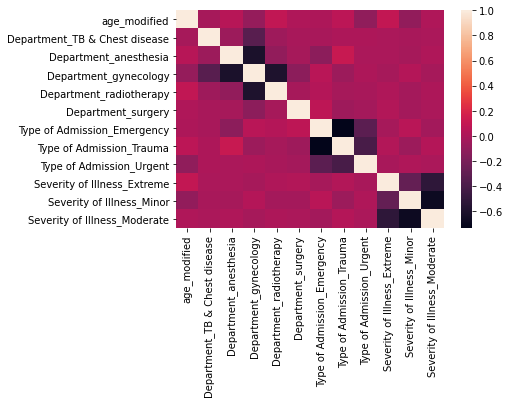

In [6]:
sb.heatmap(data_train.corr(method='pearson'))

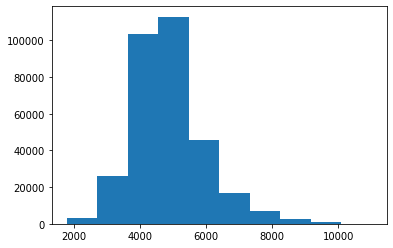

In [ ]:
plt.hist(data_train['Admission_Deposit'])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder,scale

In [ ]:
label_encoder=LabelEncoder()
newdata=label_encoder.fit_transform(traindf['Stay'])
pd.Series(newdata)

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Length: 318438, dtype: int64

In [ ]:
data_train

array([[-0.16917678, -0.72792324,  0.58658322, ...,  2.14800215,
        -0.60764885, -1.11047911],
       [-1.02521686, -0.72792324,  0.58658322, ...,  2.14800215,
        -0.60764885, -1.11047911],
       [-1.02521686, -0.72792324,  0.69104747, ...,  2.14800215,
        -0.60764885, -1.11047911],
       ...,
       [-0.16917678, -0.16104865,  1.42229724, ..., -0.46554888,
         1.64568732, -1.11047911],
       [-0.16917678,  0.97270052, -1.8683267 , ..., -0.46554888,
         1.64568732, -1.11047911],
       [ 1.5429034 , -0.72792324, -1.81609458, ..., -0.46554888,
         1.64568732, -1.11047911]])

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     data_train,newdata, test_size=0.33, random_state=42)
model= RandomForestClassifier(n_jobs=-1,n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_predict=model.predict(X_test)
(len(y_predict[y_predict==y_test])/len(y_predict))*100


28.87281724318409

In [ ]:
(precision,recall,fscore,support)=score(y_test,y_predict)
print("precision:{} /Recall:{} /Accuracy:{}".format(precision,recall,len((y_predict==y_test))/len(y_predict)))

precision:[0.13802083 0.28798571 0.30095012 0.17532468 0.04       0.14454976
 0.         0.05405405 0.10526316 0.25       0.08928571] /Recall:[0.00675073 0.50823117 0.56808305 0.03428477 0.00078003 0.01046222
 0.         0.00119725 0.00125471 0.00110988 0.00229358] /Accuracy:1.0
